## Customer Churn Project

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [78]:
data=pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
data.shape

(7043, 21)

In [80]:
data.size

147903

### Extract 5 column and store it in cust_5

In [81]:
cust_5=data.iloc[0:,4] ##data.loc[:,['colname']]
cust_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [82]:
cust_15=data.iloc[:,14]
cust_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [83]:
cust_15=data["Dependents"]
cust_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

### Extract all male senior citizen whose payment method is electronic and store in senior_male_elect

In [84]:
senior_male_elect=data[(data["gender"]=='Male')&(data["SeniorCitizen"]==0)|(data["SeniorCitizen"]==1)&(data["PaymentMethod"]=='Electronic check')]
senior_male_elect

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No


### Extract all customers whose tenure is greater than 70 months or their monthly charges is greater than $100 and store in cust_tenure

In [85]:
cust_tenure=data[(data["tenure"]>70)&(data["MonthlyCharges"]>100)][['customerID','tenure','MonthlyCharges']]
cust_tenure

,customerID,tenure,MonthlyCharges
17,9959-WOFKT,71,106.70
59,5954-BDFSG,72,107.50
94,9848-JQJTX,72,100.90
106,6728-DKUCO,72,104.15
193,9680-NIAUV,72,109.70
...,...,...,...
6859,3508-CFVZL,71,111.30
6934,6257-DTAYD,71,104.15
6992,0218-QNVAS,71,100.55
7022,7203-OYKCT,72,104.95


### Extract all the customers whose contract is of 2 years and payment method is mailcheck and the value of churn is yes and store it in two_mail

In [86]:
two_mail_yes=data.loc[(data["Contract"]=='Two year') & (data["PaymentMethod"]=='Mailed check') & (data["Churn"]=='Yes'),['customerID','Contract','PaymentMethod','Churn']]
two_mail_yes

,customerID,Contract,PaymentMethod,Churn
268,6323-AYBRX,Two year,Mailed check,Yes
5947,7951-QKZPL,Two year,Mailed check,Yes
6680,9412-ARGBX,Two year,Mailed check,Yes




### Extract random 333 records from dataset

In [87]:
cust_333=data.sample(333)
cust_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4035,1485-YDHMM,Male,0,Yes,Yes,52,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),93.25,4631.7,No
6600,4592-IWTJI,Female,0,Yes,Yes,3,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Credit card (automatic),29.70,91.7,Yes
1798,3506-OVLKD,Male,0,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),26.20,954.9,No
2727,3387-VATUS,Male,0,No,No,5,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),94.85,462.8,Yes
1472,9283-LZQOH,Male,0,Yes,Yes,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.40,896.75,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,9985-MWVIX,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
6295,7033-CLAMM,Female,0,Yes,Yes,48,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.20,1027.25,No
4454,8410-BGQXN,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,93.4,No
2485,9921-ZVRHG,Female,0,No,No,14,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,1072,Yes


### Get the count of different levels from churn from dataset

In [88]:
valuecount=data['Churn'].value_counts()
valuecount

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# Visualization
### Bar plot the internetservice column using orange colour

In [89]:
x=data["InternetService"].value_counts().keys().tolist()
y=data["InternetService"].value_counts().tolist()
x,y

(['Fiber optic', 'DSL', 'No'], [3096, 2421, 1526])

Text(0.5, 1.0, 'Distribution of Internet service')

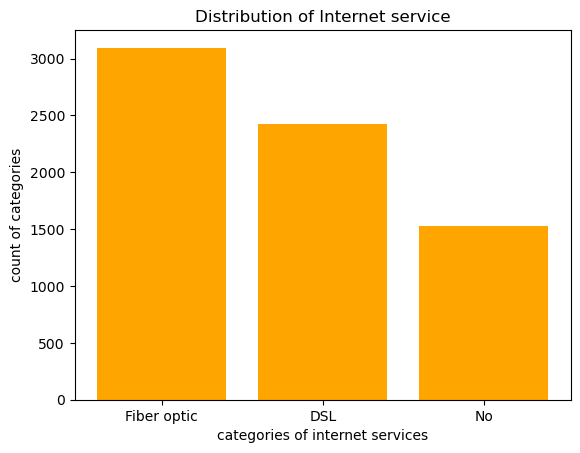

In [90]:
plt.bar(x,y,color='orange')
plt.xlabel('categories of internet services')
plt.ylabel('count of categories')
plt.title('Distribution of Internet service')

### For tenure column use histogram plot and use green colour

In [ ]:
plt.hist(data['tenure'],color='green',bins=30)
plt.title("Distribution of Tenure")

### Make a Scatterplot between tenure and monthly charges

In [ ]:
sns.scatterplot(x=data.tenure,y=data.MonthlyCharges,data=data,color='brown')
plt.xlabel=('tenure of customer')
plt.ylabel=('monthly charges of customer')
plt.title('Dist bet tenure and monthly charges')

### Build a boxplot between tenure and contract(x=tenure,y=contract)

In [ ]:
data.boxplot('tenure','Contract')

### Linear Regression

In [ ]:
x=data.tenure
y=data.MonthlyCharges

In [ ]:
#x

In [ ]:
#y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
x_train.shape

In [ ]:
y_train.head()

In [ ]:
c=a[:,np.newaxis]
c.shape

In [ ]:
x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)

In [ ]:
x_train.shape

In [ ]:
# Model building
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# x_train=np.array(x_train).reshape(-1,1)
# x_test=np.array(x_test).reshape(-1,1)

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
pred=lr.predict(x_test)
pred

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(pred,y_test)
mse

In [ ]:
rmse=np.sqrt(mse)
rmse

In [ ]:
Error=rmse
Error

### a.Logistic Regresion

In [92]:
from sklearn.linear_model import LogisticRegression

In [111]:
x=pd.DataFrame(data.MonthlyCharges)
y=pd.DataFrame(data.Churn)

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=10)

In [101]:
x_train=np.array(x_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)

In [113]:
x_train.shape

(4577, 1)

In [114]:
log_reg=LogisticRegression()

In [116]:
log_reg.fit(x_train,y_train)

C:\Users\mma\Downloads\New folder\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [117]:
predicts=log_reg.predict(x_test)
predicts

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [123]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [120]:
confusion_matrix(y,log_reg.predict(x))

array([[5174,    0],
       [1869,    0]], dtype=int64)

In [124]:
accuracy_score(y,log_reg.predict(x))

0.7346301292063041

### b.Logistic Regression

In [126]:
x=pd.DataFrame(data[["MonthlyCharges","tenure"]])
y=pd.DataFrame(data["Churn"])

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [133]:
x_train.shape

(5634, 2)

In [134]:
y_train.shape

(5634, 1)

In [135]:
logic=LogisticRegression()
logic.fit(x_train,y_train)

C:\Users\mma\Downloads\New folder\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [137]:
preds=logic.predict(x_test)
preds

array(['No', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [139]:
confusion_matrix(y,logic.predict(x))

array([[4680,  494],
       [1031,  838]], dtype=int64)

In [141]:
accuracy_score(y_test,preds)

0.7849538679914834

### Decision Tree

In [142]:
x=data.tenure
y=data.Churn

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [149]:
print(x_train.shape,y_train.shape)


(5634, 2) (5634, 1)


In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [153]:
y_pred=dt.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [156]:
confusion_matrix(y_test,y_pred)

array([[877, 189],
       [183, 160]], dtype=int64)

In [157]:
accuracy_score(y_test,y_pred)

0.7359829666430092

### Random Forest

In [158]:
x=data[["MonthlyCharges","tenure"]]
y=data["Churn"]

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rt=RandomForestClassifier()
rt.fit(x_train,y_train)

RandomForestClassifier()

In [163]:
prd=rt.predict(x_test)
prd

array(['No', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [165]:
confusion_matrix(y_test,prd)

array([[904, 162],
       [178, 165]], dtype=int64)

In [166]:
accuracy_score(y_test,prd)

0.758694109297374